#### Audio Example for Convolution

In [1]:
import IPython.display as ipd
from scipy.io import wavfile

In [51]:
fs1, impulse_response = wavfile.read('./ImpulseResponses/S1R2_sweep4000.wav')
fs2, audio_file = wavfile.read('./SoundFiles/A_garvis.wav')
audio_file = np.mean(audio_file,axis=1)

C:\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [52]:
from scipy.signal import convolve
import glob
y = []
for f in glob.glob('./ImpulseResponses/*'):
    fs1, impulse_response = wavfile.read(f)
    y.append(convolve(audio_file.astype('float32'),impulse_response.astype('float32')))

In [69]:
ipd.Audio(data=audio_file,rate=fs2)

In [70]:
ipd.Audio(data=impulse_response,rate=fs1)

In [55]:
ipd.Audio(data=y[0],rate=fs1)

In [68]:
wavfile.write('./SoundFiles/Output.wav',fs2,np.int16(y[0]/np.max(np.abs(y[0])) * 32767))

#### Image Processing Convolution Examples

In [85]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
%matplotlib inline

In [76]:
img = data.camera()

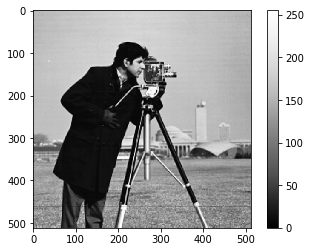

In [79]:
plt.imshow(img,'Greys_r');
plt.colorbar();

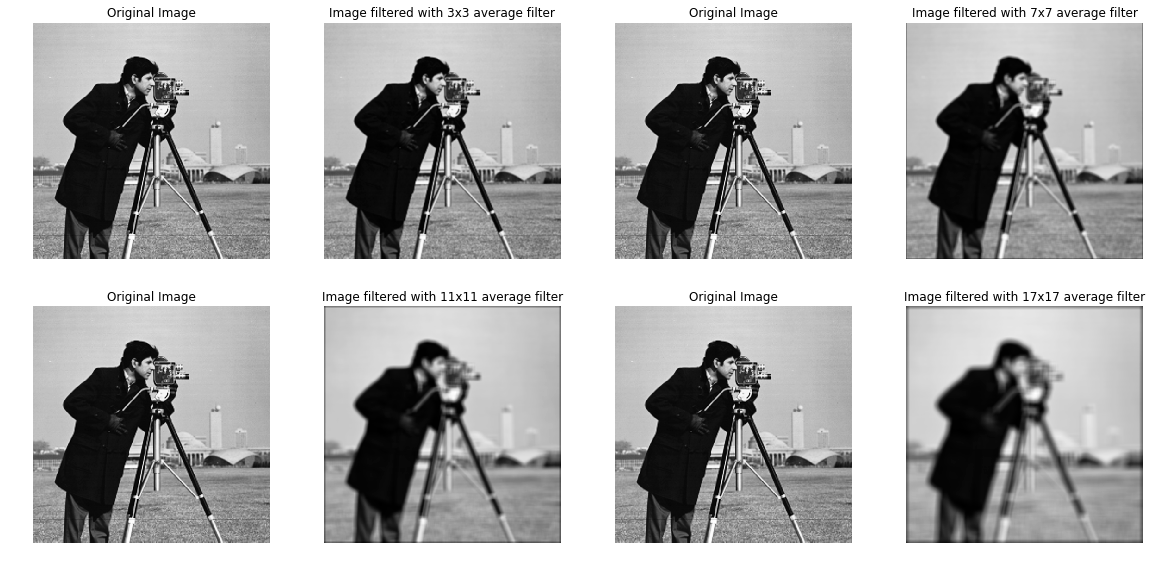

In [159]:
idx=1
plt.figure(figsize=(20,20))
for k in [3,7,11,17]:
    average_filter = 1/(k**2)*(np.ones((k,k)))
    filtered_image = convolve2d(img,average_filter,mode='same')
    plt.subplot(4,4,idx);
    plt.imshow(img,'Greys_r');
    plt.axis('off')
    plt.title('Original Image');
    idx+=1
    plt.subplot(4,4,idx);
    plt.imshow(filtered_image,'Greys_r');
    plt.axis('off')
    plt.title(f'Image filtered with {k}x{k} average filter')
    idx+=1
plt.savefig('./FilterImages/average_filters.png',bbox_inches='tight')

In [108]:
sobel_x = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sobel_y = sobel_x.T

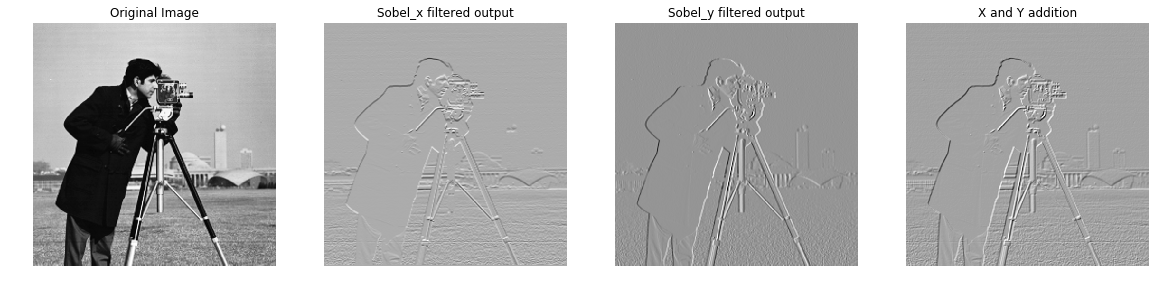

In [161]:
plt.figure(figsize=(20,10));
plt.subplot(141);
plt.imshow(img,'Greys_r');
plt.title('Original Image');
plt.axis('off')
plt.subplot(142);
plt.imshow(convolve2d(img,sobel_x,mode='same'),'Greys_r');
plt.axis('off')
plt.title('Sobel_x filtered output');
plt.subplot(143);
plt.imshow(convolve2d(img,sobel_y,mode='same'),'Greys_r');
plt.axis('off')
plt.title('Sobel_y filtered output');
plt.subplot(144);
plt.imshow(convolve2d(img,sobel_x,mode='same')+convolve2d(img,sobel_y,mode='same'),'Greys_r')
plt.axis('off')
plt.title('X and Y addition');
plt.savefig('./FilterImages/Sobel_filters.png',bbox_inches='tight')

In [162]:
laplacian1 = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]]) 
laplacian2 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

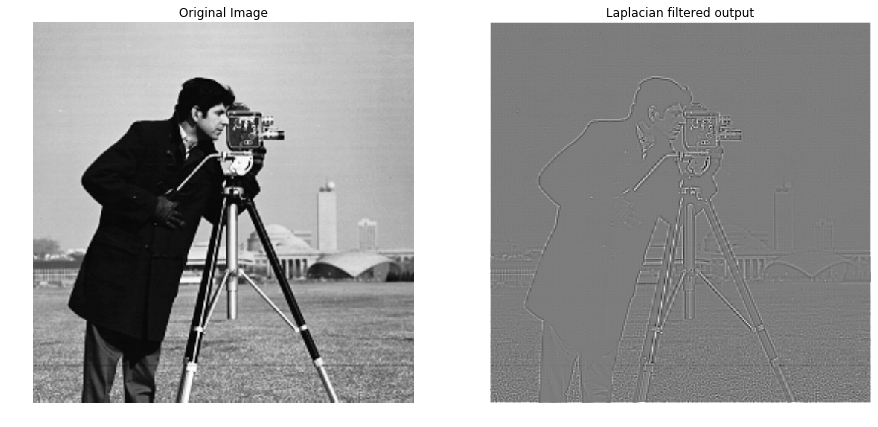

In [170]:
plt.figure(figsize=(15,10));
plt.subplot(121);
plt.imshow(img,'Greys_r');
plt.title('Original Image');
plt.axis('off')
plt.subplot(122);
plt.imshow(convolve2d(img/255,laplacian2,mode='same'),'Greys_r');
plt.axis('off')
plt.title('Laplacian filtered output');
# plt.subplot(133);
# plt.imshow(convolve2d(img/255,laplacian2,mode='same'),'Greys_r');
# plt.axis('off')
# plt.title('Laplacian2 filtered output');
plt.savefig('./FilterImages/Laplacian.png',bbox_inches='tight')

In [173]:
gaussian = (1/16)*np.array([[1,2,1],[2,4,2],[1,2,1]]) 
average_filter = 1/(3**2)*(np.ones((3,3)))

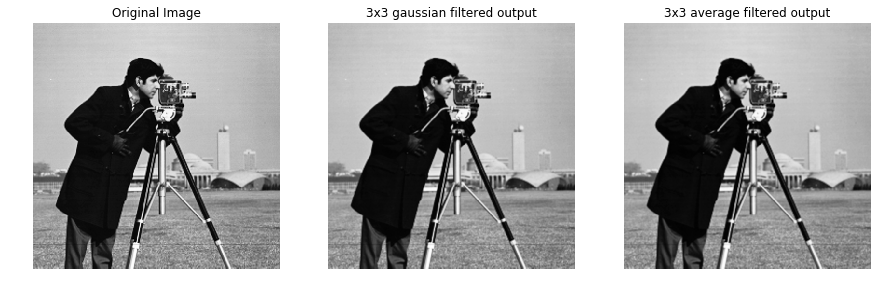

In [177]:
plt.figure(figsize=(15,10));
plt.subplot(131);
plt.imshow(img,'Greys_r');
plt.title('Original Image');
plt.axis('off')
plt.subplot(132);
plt.imshow(convolve2d(img/255,gaussian,mode='same'),'Greys_r');
plt.axis('off')
plt.title('3x3 gaussian filtered output');
plt.subplot(133);
plt.imshow(convolve2d(img/255,average_filter,mode='same'),'Greys_r');
plt.axis('off')
plt.title('3x3 average filtered output');
plt.savefig('./FilterImages/gaussian_filter.png',bbox_inches='tight')